<a href="https://colab.research.google.com/github/ydatta/datafile/blob/main/22_05_18_P_session_17_VAR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Whenever we are going to construct a VAR model we have to follow these steps
1. import pandas & numpy library for uploading and number reading in data table
2. import matplotlib for plotting the data
3. Splitting the data into train(90%) & test(10%) and using the **train data for   ADFuller, VAR & VARMAX**
4. import ADFuller for stationarity check
5. import VAR for VAR order selection or lag determination with AIC test
6. import VARMAX for constructing actual VAR model
7. Use of VAR model for forecasting next (10% time)
8. Comparing **test data  with forecasted data**  to see accuracy of predictability of VAR model

1. Importing library pandas & nmpy for numbers & for uploading data table

In [2]:
import pandas as pd
import numpy as np

In [3]:
filepath='https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'

In [4]:
macro_data=pd.read_csv(filepath,parse_dates=['date'],index_col='date')

In [ ]:
macro_data.head()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


2. ploting the data table

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

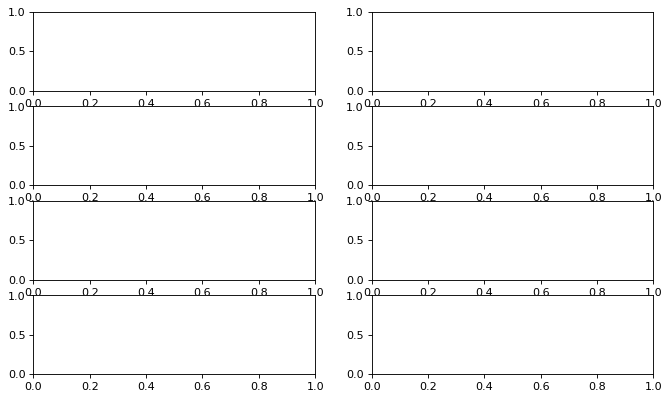

In [ ]:
# Essentials for ploting 
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=80,figsize=(10,6))


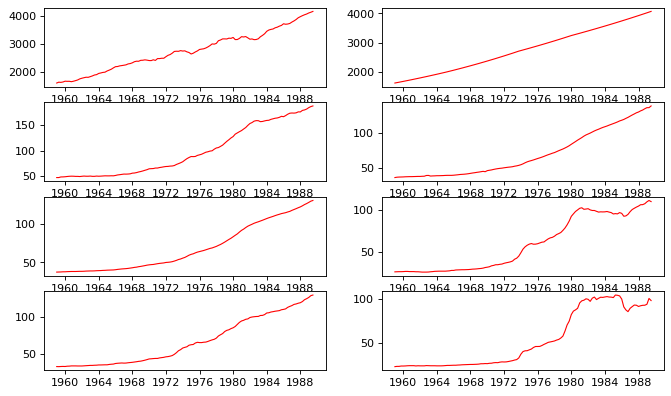

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=80,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  

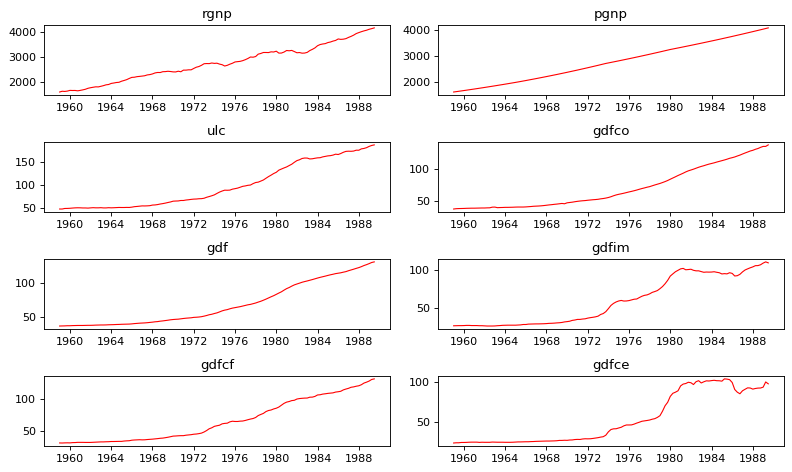

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=80,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(macro_data.columns[i])
plt.tight_layout()

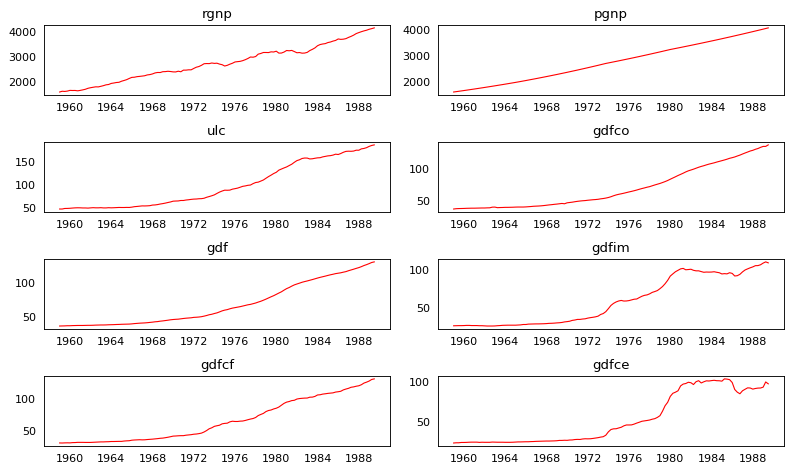

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=80,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(macro_data.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
plt.tight_layout()

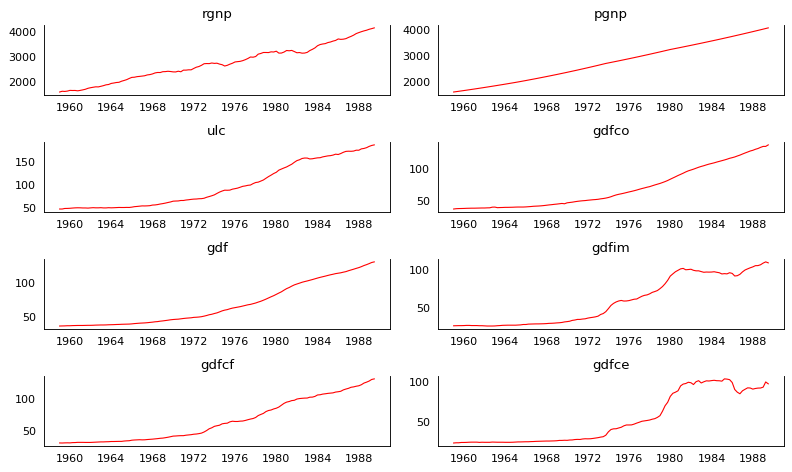

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=80,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(macro_data.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)

plt.tight_layout()

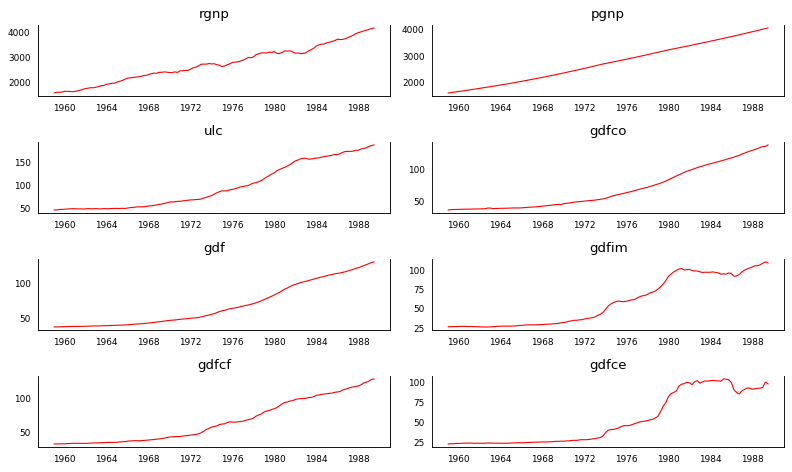

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=80,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(macro_data.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=8)

plt.tight_layout()

3. Splitting the data into train(90%) & test(10%) and using the **train data for   ADFuller, VAR & VARMAX**

In [5]:
train_dt=macro_data[0:-4]
test_dt=macro_data[-4:]

In [9]:
train_dt.tail()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1987-07-01,3872.8,3877.7,173.9,126.0,119.6,101.9,117.7,93.1
1987-10-01,3935.6,3901.0,175.8,127.6,120.8,103.3,118.7,92.9
1988-01-01,3974.8,3924.5,175.7,128.7,121.9,104.5,119.4,91.5
1988-04-01,4010.7,3948.1,178.7,130.3,123.3,106.1,121.0,92.3
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8


In [7]:
test_dt

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


4. import ADFuller for stationarity check

In [10]:
from statsmodels.tsa.stattools import adfuller

In [20]:
print('p value of original rgnp')
adfuller(train_dt.rgnp)[1]

p value of original rgnp


0.9861171706093795

this p value is higher than 0.05 so original rgnap is not stationary

now we take first order diferencing rgnp series for stationarity check

In [15]:
print('p value of 1st order diff rgnp')
adfuller(train_dt.rgnp.diff().dropna())[1]

p value of 1st order diff rgnp


4.419602687789602e-06

p value of 1st order diff rgnp is less than 0.05 so we consider this series of rgnp is stationary

all series are becoming stationary at second order differencing we consider second order differencing for further analysis of VAR order selection (AIC lag dermination) & VARMAX

In [26]:
train_dt.diff2=(train_dt.diff().diff().dropna())

In [29]:
train_dt.head()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


In [28]:
train_dt.diff2.head()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-07-01,-38.1,0.1,1.2,-3.000000e-01,0.0,0.0,0.3,-0.3
1959-10-01,21.4,0.1,-1.1,-1.000000e-01,0.1,-0.1,-0.1,0.4
1960-01-01,14.3,0.2,0.2,-7.105427e-15,-0.2,0.1,-0.2,-0.4
1960-04-01,-33.0,0.1,0.2,1.000000e-01,0.2,0.1,0.5,0.1
1960-07-01,6.4,0.1,-0.1,-1.000000e-01,-0.1,-0.2,-0.3,0.1


5. import VAR for VAR order selection or lag determination with AIC test

In [24]:
from statsmodels.tsa.api import VAR

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
model=VAR(train_dt.diff2)

In [35]:
result=model.select_order(maxlags=12)


In [36]:
print(result.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0     -0.07898      0.1232      0.9241    0.002961
1      -0.5721       1.248      0.5662      0.1653
2      -0.8256       2.612      0.4482      0.5674
3       -1.007       4.048      0.3937       1.042
4       -1.255       5.418      0.3399       1.449
5       -1.230       7.060      0.4147       2.129
6       -1.739       8.169      0.3286       2.276
7       -2.142       9.384      0.3340       2.528
8       -2.964       10.18      0.2744       2.362
9       -4.562       10.20      0.1413       1.420
10      -6.541       9.838     0.08188     0.09578
11      -8.923       9.073     0.08023      -1.631
12     -21.28*     -1.667*  3.604e-05*     -13.33*
--------------------------------------------------


On the basis of VAR select order summary we come to know that first minimum AIC is found at 4th lag so we will consider 4 lags for VARMAX

6. import VARMAX for constructing actual VAR model

In [37]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [38]:
VARMAX_result=model.fit(4)

In [39]:
print(VARMAX_result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 19, May, 2022
Time:                     12:24:10
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    4.37122
Nobs:                     113.000    HQIC:                  0.584936
Log likelihood:          -905.679    FPE:                   0.155570
AIC:                     -2.00074    Det(Omega_mle):       0.0200322
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            2.430021         2.677505            0.908           0.364
L1.rgnp         -0.750066         0.159023           -4.717           0.000
L1.pgnp         -0.095621         4.938865           -0.019           0.985
L1.ul

7. Use of VAR model for forecasting next (10% time)